# Proyecto Equipo 5
# Uso del Módulo 4 - Machine Learning
## Etiquetado de datos

## Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Importamos la fuente de datos

In [2]:
df_ant=pd.read_csv('../archive/application_credit_record.csv')
df_ant.head()

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,AGE_YEARS,timespan,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan
0,0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,...,32,16,13,1,1,0,0,0,0,1
1,1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,...,32,15,12,1,1,0,0,0,0,1
2,2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,...,58,30,7,7,0,0,0,0,0,16
3,3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,52,5,0,2,0,0,0,0,0,3
4,4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,52,5,0,0,0,0,0,0,0,5


## Formateo de base de datos

In [3]:
df_ant.columns

Index(['Unnamed: 0', 'ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_EMPLOYED', 'AGE_YEARS',
       'timespan', 'paid_off', 'pastdue_1-29', 'pastdue_30-59',
       'pastdue_60-89', 'pastdue_90-119', 'pastdue_120-149',
       'pastdue_over_150', 'no_loan'],
      dtype='object')

In [4]:
#Creamos un nuevo dataframe que no incluya aquellas columnas que no serán útiles para la determinación del score crediticio.
df_clean = df_ant.drop(columns=["Unnamed: 0","CODE_GENDER","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_EMAIL","OCCUPATION_TYPE","CNT_CHILDREN","CNT_FAM_MEMBERS","FLAG_PHONE","AGE_YEARS"])

#La edad se elimina ya que el valor mínimo es 20, por lo que todos los registros son de personas mayores de edad.

In [5]:
df_clean.describe()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,MONTHS_EMPLOYED,timespan,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan
count,3.645700e+04,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.379708,0.672189,1.866857e+05,72.939463,21.332392,9.039032,7.972516,0.239926,0.021971,0.007845,0.005870,0.041885,4.003346
std,4.187524e+04,0.485321,0.469422,1.017892e+05,78.822135,14.911849,13.026453,7.748513,0.947265,0.209588,0.100982,0.093212,0.895565,8.667466
min,5.008804e+06,0.000000,0.000000,2.700000e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.042028e+06,0.000000,0.000000,1.215000e+05,13.000000,9.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.074614e+06,0.000000,1.000000,1.575000e+05,51.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.115396e+06,1.000000,1.000000,2.250000e+05,105.000000,31.000000,15.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,5.150487e+06,1.000000,1.000000,1.575000e+06,523.000000,61.000000,59.000000,60.000000,27.000000,8.000000,4.000000,7.000000,48.000000,61.000000


## Determinación de contribución de cada parámetro

### Propiedades

In [6]:
#Contar con una propiedad (sea rentada o propia) y tendrá un peso de 10% en el score crediticio.
#Nota: Sustituye al 10% que en el score FICO lo constituye la combinación de créditos, ya que no contamos con dicha información.

def creditScoreproperties(df):
  add = 0

  if(df["FLAG_OWN_CAR"] == 1):
    add += 0.4
  if(df["FLAG_OWN_REALTY"] == 1) :
    add += 0.6
  added = 550*0.1*add
  return added

In [7]:
df_clean['score_properties'] = df_clean.apply(creditScoreproperties, axis=1)

### Meses empleados

In [8]:
#Tener más de 3 años empleados en total tendrá un peso del 10% en el score crediticio.
#Nota: Sustituye al 10% que en el score FICO lo constituye las solicitudes de crédito recientes, ya que no contamos con dicha información.

def creditScoreMonths(df):
  add = 0

  if(df["MONTHS_EMPLOYED"] >= 36):
    add += 1
  else:
    add += df["MONTHS_EMPLOYED"]/36
  added = 550*0.1*add
  return added

In [9]:
df_clean['score_months_employed'] = df_clean.apply(creditScoreMonths, axis=1)

### Ingreso anual

In [10]:
#Tener un ingreso anual superior a 150,000 tendrá un peso del 15% en el score crediticio.
#Nota: Sustituye a la cantidad adeudada en el score FICO, pero se le asignó el peso del histórico de crédito.

def creditScoreIncome(df):
  add = 0

  if(df["AMT_INCOME_TOTAL"] >= 150000):
    add += 1
  else:
    add += df["AMT_INCOME_TOTAL"]/150000
  added = 550*0.15*add
  return added

In [11]:
df_clean['score_income'] = df_clean.apply(creditScoreIncome, axis=1)

### Histórico de crédito

In [12]:
#Tener un historial de crédito (sin importar el comportamiento de pagos mayor a año y medio) tendrá un peso del 30% en el score crediticio.
#Nota: Este parámetro está presente en el score FICO, sin embargo se le asignó el porcentaje de la cantidad adeudada, ya que no contamos con esa información.

def creditScoreLenght(df):
  add = 0

  if(df["timespan"] >= 18):
    add += 1
  else:
    add += df["timespan"]/18
  added = 550*0.30*add
  return added

In [13]:
df_clean['score_lenght'] = df_clean.apply(creditScoreLenght, axis=1)

### Historial de pagos

In [14]:
#Un historial de pagos al día tendrá un peso del 35% en el score crediticio.
#Nota: Este parámetro tiene el mismo peso que en el score FICO.

def creditScoreHistoric(df):
  add = 0
  if ((df["paid_off"] + df["pastdue_1-29"]) == df["timespan"]):
    add+=1
  elif (df["pastdue_over_150"]>= df["timespan"]*0.60):
    add+=0.09
  elif(df["no_loan"] >= df["timespan"]*0.45):
    add+=0.5
  elif ((df["paid_off"] + df["pastdue_1-29"]) >= df["timespan"]*0.85):
    add+=0.75
  elif((df["pastdue_1-29"] + df["pastdue_30-59"]) >= df["timespan"]*0.6):
    add += 0.65
  elif((df["pastdue_1-29"] + df["pastdue_30-59"] + df["pastdue_60-89"]+df["no_loan"]) >= df["timespan"]*0.65):
    add += 0.55
  elif((df["pastdue_1-29"] + df["pastdue_30-59"] + df["pastdue_60-89"]+ df["pastdue_90-119"]+df["no_loan"]) >= df["timespan"]*0.7):
    add += 0.40
  elif((df["pastdue_1-29"] + df["pastdue_30-59"] + df["pastdue_60-89"]+ df["pastdue_90-119"] + df["pastdue_120-149"]+df["no_loan"]) >= df["timespan"]*0.8):
    add += 0.25
  elif((df["pastdue_1-29"] + df["pastdue_30-59"] + df["pastdue_60-89"]+ df["pastdue_90-119"]+ df["pastdue_120-149"]+ df["pastdue_over_150"]+df["no_loan"]) >= df["timespan"]*0.85):
    add += 0.15

  added = 550*0.35*add
  return added

In [15]:
df_clean['score_historic'] = df_clean.apply(creditScoreHistoric, axis=1)

## Determinación de score final

In [16]:
#El mínimo del score FICO es de 300.
df_clean["Score"]=300+df_clean['score_lenght']+df_clean['score_income']+df_clean['score_months_employed']+df_clean['score_properties'] + df_clean["score_historic"]

In [17]:
df_clean

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,MONTHS_EMPLOYED,timespan,paid_off,pastdue_1-29,pastdue_30-59,...,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,score_properties,score_months_employed,score_income,score_lenght,score_historic,Score
0,5008804,1,1,427500.0,Rented apartment,151,16,13,1,1,...,0,0,0,1,55.0,55.0,82.500,146.666667,144.375,783.541667
1,5008805,1,1,427500.0,Rented apartment,151,15,12,1,1,...,0,0,0,1,55.0,55.0,82.500,137.500000,144.375,774.375000
2,5008806,1,1,112500.0,House / apartment,37,30,7,7,0,...,0,0,0,16,55.0,55.0,61.875,165.000000,96.250,733.125000
3,5008808,0,1,270000.0,House / apartment,101,5,0,2,0,...,0,0,0,3,33.0,55.0,82.500,45.833333,96.250,612.583333
4,5008809,0,1,270000.0,House / apartment,101,5,0,0,0,...,0,0,0,5,33.0,55.0,82.500,45.833333,96.250,612.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,1,1,157500.0,House / apartment,57,18,6,12,0,...,0,0,0,0,55.0,55.0,82.500,165.000000,192.500,850.000000
36453,5150483,1,1,157500.0,House / apartment,57,18,0,0,0,...,0,0,0,18,55.0,55.0,82.500,165.000000,96.250,753.750000
36454,5150484,1,1,157500.0,House / apartment,57,13,1,12,0,...,0,0,0,0,55.0,55.0,82.500,119.166667,192.500,804.166667
36455,5150485,1,1,157500.0,House / apartment,57,2,0,2,0,...,0,0,0,0,55.0,55.0,82.500,18.333333,192.500,703.333333


In [18]:
#Eliminamos las columnas que nos sirvieron temporalmente para calcular el score.
df_score=df_clean.drop(columns=['score_lenght','score_income','score_months_employed','score_properties',"score_historic"])

In [19]:
df_clean.describe()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,MONTHS_EMPLOYED,timespan,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,score_properties,score_months_employed,score_income,score_lenght,score_historic,Score
count,3.645700e+04,36457.000000,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.379708,0.672189,1.866857e+05,72.939463,21.332392,9.039032,7.972516,0.239926,0.021971,0.007845,0.005870,0.041885,4.003346,30.535809,39.440067,73.340886,124.853435,146.249838,714.420035
std,4.187524e+04,0.485321,0.469422,1.017892e+05,78.822135,14.911849,13.026453,7.748513,0.947265,0.209588,0.100982,0.093212,0.895565,8.667466,18.680076,22.097767,14.110314,50.104641,46.649748,78.492280
min,5.008804e+06,0.000000,0.000000,2.700000e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.850000,9.166667,0.000000,373.211111
25%,5.042028e+06,0.000000,0.000000,1.215000e+05,13.000000,9.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.861111,66.825000,82.500000,125.125000,661.166667
50%,5.074614e+06,0.000000,1.000000,1.575000e+05,51.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,33.000000,55.000000,82.500000,165.000000,144.375000,723.500000
75%,5.115396e+06,1.000000,1.000000,2.250000e+05,105.000000,31.000000,15.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,55.000000,55.000000,82.500000,165.000000,192.500000,773.825000
max,5.150487e+06,1.000000,1.000000,1.575000e+06,523.000000,61.000000,59.000000,60.000000,27.000000,8.000000,4.000000,7.000000,48.000000,61.000000,55.000000,55.000000,82.500000,165.000000,192.500000,850.000000


## Etiquetado de datos de acuerdo con el score FICO


In [20]:
#Para este proceso se emplearon las etiquetas de acuerdo con el score FICO.
#800 to 850: Excellent
#740 to 799: Very good
#670 to 739: Good
#580 to 669: Fair
#300 to 579: Poor
#https://www.consumerfinance.gov/ask-cfpb/what-is-a-fico-score-en-1883/
def Classification(df):
  etiqueta = 0
  if (df["Score"] <= 579):
    etiqueta = 1 #Poor
  elif (579 < df["Score"] <= 669):
    etiqueta = 2 #Fair
  elif (669 < df["Score"] <= 739):
    etiqueta = 3 #Good
  elif (739 < df["Score"] <= 799):
    etiqueta = 4 #Very Good
  elif (df["Score"]> 799):
    etiqueta = 5 #Excellent
  return etiqueta

In [21]:
df_score["label"] = df_score.apply(Classification, axis=1)

In [22]:
df_score

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,MONTHS_EMPLOYED,timespan,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,Score,label
0,5008804,1,1,427500.0,Rented apartment,151,16,13,1,1,0,0,0,0,1,783.541667,4
1,5008805,1,1,427500.0,Rented apartment,151,15,12,1,1,0,0,0,0,1,774.375000,4
2,5008806,1,1,112500.0,House / apartment,37,30,7,7,0,0,0,0,0,16,733.125000,3
3,5008808,0,1,270000.0,House / apartment,101,5,0,2,0,0,0,0,0,3,612.583333,2
4,5008809,0,1,270000.0,House / apartment,101,5,0,0,0,0,0,0,0,5,612.583333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,1,1,157500.0,House / apartment,57,18,6,12,0,0,0,0,0,0,850.000000,5
36453,5150483,1,1,157500.0,House / apartment,57,18,0,0,0,0,0,0,0,18,753.750000,4
36454,5150484,1,1,157500.0,House / apartment,57,13,1,12,0,0,0,0,0,0,804.166667,5
36455,5150485,1,1,157500.0,House / apartment,57,2,0,2,0,0,0,0,0,0,703.333333,3


In [23]:
value_counts = df_score['label'].value_counts()
print(value_counts)

label
3    11114
4    10013
2     7958
5     5279
1     2093
Name: count, dtype: int64


<Axes: xlabel='label'>

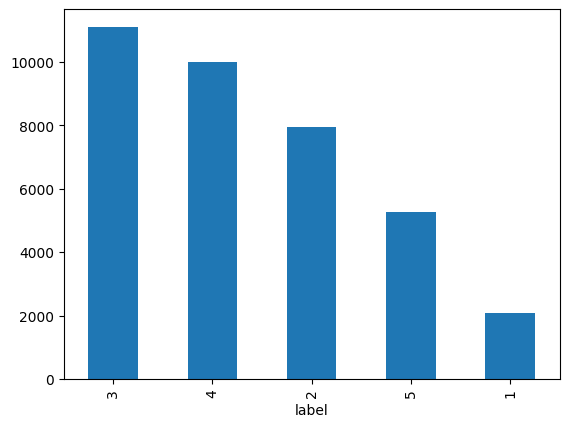

In [24]:
value_counts.plot(kind='bar')


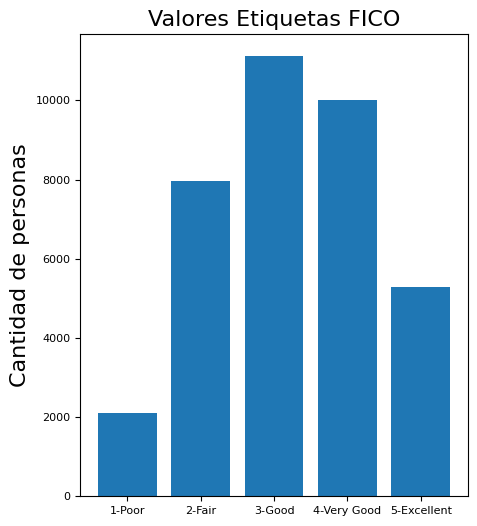

In [25]:
fsize = 16
plt.figure(figsize=(5,6))
plt.bar(value_counts.index,value_counts.values)
plt.title(f'Valores Etiquetas FICO',fontsize=fsize)
#plt.xlabel('Etiquetas',fontsize=fsize)
plt.ylabel('Cantidad de personas',fontsize=fsize)
plt.xticks([1, 2, 3, 4, 5], ['1-Poor', '2-Fair', '3-Good', '4-Very Good','5-Excellent'])
plt.tick_params(axis='both', labelsize=8)

([<matplotlib.axis.XTick at 0x13cb35810>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

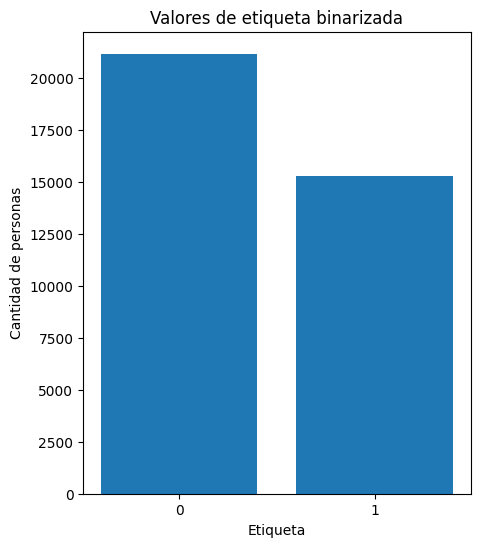

In [26]:
bin_labels = pd.Series(data=np.where(df_score['label'] <= 3, 0, 1))
valores = bin_labels.value_counts()
plt.figure(figsize=(5,6))
plt.bar(valores.index,valores.values)
plt.title(f'Valores de etiqueta binarizada')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad de personas')
plt.xticks([0, 1], ['0', '1'])


In [27]:
df_score['bin_labels'] = bin_labels
df_score

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,MONTHS_EMPLOYED,timespan,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,Score,label,bin_labels
0,5008804,1,1,427500.0,Rented apartment,151,16,13,1,1,0,0,0,0,1,783.541667,4,1
1,5008805,1,1,427500.0,Rented apartment,151,15,12,1,1,0,0,0,0,1,774.375000,4,1
2,5008806,1,1,112500.0,House / apartment,37,30,7,7,0,0,0,0,0,16,733.125000,3,0
3,5008808,0,1,270000.0,House / apartment,101,5,0,2,0,0,0,0,0,3,612.583333,2,0
4,5008809,0,1,270000.0,House / apartment,101,5,0,0,0,0,0,0,0,5,612.583333,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5150482,1,1,157500.0,House / apartment,57,18,6,12,0,0,0,0,0,0,850.000000,5,1
36453,5150483,1,1,157500.0,House / apartment,57,18,0,0,0,0,0,0,0,18,753.750000,4,1
36454,5150484,1,1,157500.0,House / apartment,57,13,1,12,0,0,0,0,0,0,804.166667,5,1
36455,5150485,1,1,157500.0,House / apartment,57,2,0,2,0,0,0,0,0,0,703.333333,3,0


In [28]:
df_score.to_csv('../archive/data_features.csv',index=False)